![0.jfif](attachment:0.jfif)

# Practice 4

<div dir="rtl">
    خب، حالا که هم شبکه های عصبی عادی و هم شبکه های عصبی کانولوشنی رو یاد گرفتید میخوایم بریم که چند تا شبکه ترین کنیم که ببینیم چه نتایجی رو کسب می کنیم

# CIFAR Dataset

<div dir="auto">
دیتاست سایفار دو ورژن داره، سایفار 10 و سایفار 100 یه سرچ ریز بزنید ببینید تفاوتاشون چیه اصلا
برای این که خیلیم دور نرید اینم لینکاش =)

https://keras.io/api/datasets/cifar10/
https://keras.io/api/datasets/cifar100/

<div dir="auto">
    با استفاده از دستورات و دیتاست های موجود در keras 
    ابتدا دیتاست سایفار10 رو لود کنید

<div dir="auto">
    بعدش هم کتابخونه هایی که نیازتون میشه رو ایمپورت کنید، چیا هستن؟

In [1]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt


<div dir="auto">
    داده های تست و ترین رو به همراه لیبل هاشون لود کنید

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


<div dir="auto">
    شیپ کلی دیتاستتون رو پرینت کنید که ببینید چه تعداد عکس ترین و چه تعداد عکس تست دارید همچنین شکل لیبل هاتون رو ببینید چطوریه

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
y_train[0]

array([6], dtype=uint8)

<div dir="auto">
    با استفاده از متپلات لیب ، یکی از عکس های دیتاستتون رو نمایش بدین که یه شکل کلی دستتون بیاد که دیتاستتون شامل چیا هستش

Label :  [0]


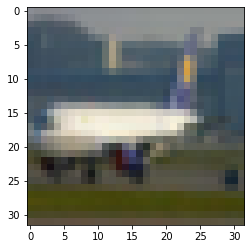

In [5]:
image_index = 93
plt.imshow(x_train[image_index] )
print('Label : ', y_train[image_index])

# ANN

<div dir="auto">
در این مرحله میخوایم که یک ANN 
    روی تصاویر دیتاست سایفار فیت کنیم. منتهی قبلش نیاز داریم که چند تا کار انجام بدیم روی داده ها!

<div dir="auto">
    اول از همه، روی خود تصاویر چه تغییری باید انجام بدیم؟ اولا میخوایم مقادیر پیکسل ها بین 0 تا 1 باشه بعدشم باید تصاویر طوری باشند که قابل ورودی دادن به شبکه ی ANN باشند
    پس باید چیکار کنیم؟

برای اینکه مقادیر ورودی بین 0 و 1 باشند می توانیم از انواع روش های اسکیل برای آن ها استفاده کنیم یا تمام مقادیر را بر 255 تقسیم کنیم و برای اینکه تصاویر قابل ورودی دادن به شبکه باشند باید به یک بردار تبدیل شوند یا به اصطلاح (flatten) شوند 

<div dir="auto">
    یه نکته ی خیلی مهم: داده هاتون رنگین! یعنی چی؟ یعنی 3 تا کانال دارن! یعنی چی؟ یعنی وقتی دارید شیپ هارو تغییر میدید بیشتر دقت کنید!

In [6]:
x_train_final = x_train.reshape(-1,32*32*3)/255
x_test_final = x_test.reshape(-1,32*32*3)/255

<div dir="auto">
    برای این که مطمئن بشید که دیتاتون به اون صورتیه میخواید، شیپ هاشون رو پرینت بکنید

In [7]:
print(x_train_final.shape)
print(x_test_final.shape)

#Expected Output : 
# (50000,3072)
# (10000,3072)

(50000, 3072)
(10000, 3072)


<div dir="auto">
حالا باید فرمت لیبل ها به اون صورتی باشه که خروجی شبکه مون هست! یعنی 10 تایی
پس با استفاده از تابع
to_categorical
از کراس لیبل های مطلوب رو بسازید

In [8]:

from tensorflow.keras.utils import to_categorical
numberof_classes = 10
y_train_cat = to_categorical(y_train, numberof_classes)
y_test_cat = to_categorical(y_test, numberof_classes)

In [9]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

<div dir="auto">
حالا باید مدلتون رو بسازید
اول از همه اون کلاس ها و توابع و لایه هایی که نیاز دارید رو ایمپورت کنید

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Input

<div dir="auto">
حالا مدلتون رو بسازید

    1. مدلتون رو به صورت Sequential بسازید
    2. لایه ی اولیه رو لایه ی Input قرار بدید و شکل ورودی رو براش مشخص کنید
    3. بعد لایه های Dense به به ترتیب با تعداد نود های 512و512و1024و10 قرار بدید و اکتیویشن های مناسب رو برای هر کدوم قرار بدید

In [11]:
model = Sequential()
model.add(Input(shape = (32*32*3)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

<div dir="auto">
مدلتون رو کامپایل کنید
تابع هزینه تون رو categorical_crossentrpy قرار بدید و از اپتیمایزر adam استفاده کنید
    
    همچنین از متریک accuracy استفاده کنید که نتایج شبکه تون براتون ملموس تر باشه

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',  metrics = ['accuracy'])

<div dir="auto">
خلاصه ی مدلتون رو نگاه کنید
چه تعداد پارامتر دارید؟

2,371,594

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 2,371,594
Trainable params: 2,371,594
Non-trainable params: 0
_________________________________________________________________


<div dir="auto">
مدلتون رو روی دیتاهایی که آماده کردید فیت کنید، از آرگمان های زیر استفاده کنید.
batch_size = 128
epochs = 30
داده های ولیدیشن هم یادتون نره! شما میخواید نتیجه ی مدلتون روی دیتاست test خوب باشه پس اونم باید توی آموزش در نظر بگیرید

In [14]:
model.fit(x_train_final, y_train_cat,batch_size= 128 ,epochs= 30,
          verbose= 1,validation_data=(x_test_final,y_test_cat))

Epoch 1/30
391/391 [==============================] - 8s 13ms/step - loss: 1.8510 - accuracy: 0.3304 - val_loss: 1.6985 - val_accuracy: 0.3887
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 1.6494 - accuracy: 0.4068 - val_loss: 1.5645 - val_accuracy: 0.4408
Epoch 3/30
391/391 [==============================] - 3s 9ms/step - loss: 1.5645 - accuracy: 0.4366 - val_loss: 1.5482 - val_accuracy: 0.4413
Epoch 4/30
391/391 [==============================] - 3s 9ms/step - loss: 1.5003 - accuracy: 0.4626 - val_loss: 1.4826 - val_accuracy: 0.4770
Epoch 5/30
391/391 [==============================] - 3s 8ms/step - loss: 1.4580 - accuracy: 0.4765 - val_loss: 1.5126 - val_accuracy: 0.4575
Epoch 6/30
391/391 [==============================] - 3s 8ms/step - loss: 1.4086 - accuracy: 0.4935 - val_loss: 1.4326 - val_accuracy: 0.4876
Epoch 7/30
391/391 [==============================] - 3s 8ms/step - loss: 1.3659 - accuracy: 0.5089 - val_loss: 1.4557 - val_accuracy: 0.4859
Epoc

<div dir="auto">
نتایج چطور بود؟

افتضاح 

# CNN

<div dir="auto">
   حالا بیاید یه شبکه ی CNN بزنیم!

<div dir="auto">
مثل قبل اولین کاری که باید بکنید اینه که داده هاتون رو به صورت مناسب تبدیل کنید
پس داده هاتون باید بین 0 تا 1 باشند

In [15]:
x_train_final = x_train/255
x_test_final = x_test/255


<div dir="auto">
حالا باید فرمت لیبل ها به اون صورتی باشه که خروجی شبکه مون هست! یعنی 10 تایی
پس با استفاده از تابع
to_categorical
از کراس لیبل های مطلوب رو بسازید

In [16]:
from tensorflow.keras.utils import to_categorical
numberof_classes = 10
y_train_cat = to_categorical(y_train, numberof_classes)
y_test_cat = to_categorical(y_test, numberof_classes)

<div dir="auto">
حالا باید مدلتون رو بسازید
اول از همه اون کلاس ها و توابع و لایه هایی که نیاز دارید رو ایمپورت کنید

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

<div dir="auto">
حالا مدلتون رو بسازید
    
    1. مدل رو به صورت Sequential تعریف کنید

    2. لایه ی ورودی رو به شبکه تون اضافه کنید و شیپی که قبول می کنه براش مشخص کنید

    3. سه تا لایه ی کانولوشنی به ترتیب با تعداد فیلتر های 32 و 32 و 32 بسازید

    4. یک لایه ی مکس پولینگ برای شبکه تون قرار بدید
    
    5. یک لایه ی فلتن به مدلتون اضافه کنید
    
6. 3 لایه ی دنس با تعداد نود های به ترتیب 64، 32، 10 بسازید و اکتیوشن های مناسب رو قرار بدید

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))




<div dir="auto">
مدلتون رو کامپایل کنید
تابع هزینه تون رو categorical_crossentrpy قرار بدید و از اپتیمایزر adam استفاده کنید
    
    همچنین از متریک accuracy استفاده کنید که نتایج شبکه تون براتون ملموس تر باشه

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

<div dir="auto">
خلاصه ی مدلتون رو نگاه کنید
چه تعداد پارامتر دارید؟

367,978

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                346176    
                                                      

<div dir="auto">
مدلتون رو روی دیتاهایی که آماده کردید فیت کنید، از آرگمان های زیر استفاده کنید.
batch_size = 128
epochs = 30
داده های ولیدیشن هم یادتون نره! شما میخواید نتیجه ی مدلتون روی دیتاست test خوب باشه پس اونم باید توی آموزش در نظر بگیرید

In [21]:
model.fit(x_train_final, y_train_cat,batch_size= 128 ,epochs= 30, 
          verbose= 1, validation_data=(x_test_final,y_test_cat))

Epoch 1/30
391/391 [==============================] - 15s 19ms/step - loss: 1.6360 - accuracy: 0.4013 - val_loss: 1.3223 - val_accuracy: 0.5243
Epoch 2/30
391/391 [==============================] - 7s 18ms/step - loss: 1.2070 - accuracy: 0.5686 - val_loss: 1.1011 - val_accuracy: 0.6090
Epoch 3/30
391/391 [==============================] - 7s 17ms/step - loss: 1.0196 - accuracy: 0.6440 - val_loss: 1.0080 - val_accuracy: 0.6451
Epoch 4/30
391/391 [==============================] - 7s 17ms/step - loss: 0.9176 - accuracy: 0.6782 - val_loss: 1.0396 - val_accuracy: 0.6352
Epoch 5/30
391/391 [==============================] - 7s 17ms/step - loss: 0.8499 - accuracy: 0.7017 - val_loss: 0.9558 - val_accuracy: 0.6674
Epoch 6/30
391/391 [==============================] - 7s 17ms/step - loss: 0.7884 - accuracy: 0.7250 - val_loss: 0.9807 - val_accuracy: 0.6653
Epoch 7/30
391/391 [==============================] - 7s 18ms/step - loss: 0.7409 - accuracy: 0.7421 - val_loss: 0.9454 - val_accuracy: 0.679

# Comparison

<div dir="auto">
    خب خسته نباشید!
    حالا نتایج رو با هم مقایسه کنید.

<div dir="auto">
تعداد پارامترهای مدل ANN چند برابر مدل CNN بود؟

2,371,594/367,978 = 6.44

...

<div dir="auto">
این تفاوت در دقت ناشی از چیه؟

چون شبکه ی ای ان ان (فارسی می نویسم چون انگلیسی جملات را به هم می زند) تمام اطلاعات تصاویر را به صورت خطی دریافت می کند متوجه رابطه ی بین پیکسل ها نمی شود و فقط به مختصات هر پیکسل نسبت به مختصات کل عکس بها می دهد و وزن ها نیز بر اساس همین تعیین می شوند ولی در شبکه ی سی ان ان وزن ها بر اساس  روابطی که پیسکل ها به صورت نسبی نسبت به یکدیگر میسازند مقداردهی می شوند 

...

# امتیازی

<div dir="auto">
    هم مدلANN و هم مدل CNN تون رو تغییر بدین!
    
    ببینید بالاترین دقتی که ازش میگیرید چقدر هستش
    
    این قسمت به صورت امتیازی هستش و اجباری نیست ولی به یادگیری خودتون خیلی کمک می کنه که بیاید نتایج رو با هم مقایسه کنید و روی مدل های مختلف آموزش انجام بدید

# ANN - new

In [22]:
x_train_final = x_train.reshape(-1,32*32*3)/255
x_test_final = x_test.reshape(-1,32*32*3)/255

In [23]:
model = Sequential()
model.add(Input(shape = (32*32*3)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1024, activation = 'tanh'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(numberof_classes , activation = 'softmax'))

In [24]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',  metrics = ['accuracy'])

In [25]:
model.fit(x_train_final, y_train_cat,batch_size= 128 ,epochs= 60,
          verbose= 1,validation_data=(x_test_final,y_test_cat))

Epoch 1/60
391/391 [==============================] - 3s 8ms/step - loss: 1.9024 - accuracy: 0.3028 - val_loss: 1.8021 - val_accuracy: 0.3463
Epoch 2/60
391/391 [==============================] - 3s 7ms/step - loss: 1.7583 - accuracy: 0.3612 - val_loss: 1.6976 - val_accuracy: 0.3874
Epoch 3/60
391/391 [==============================] - 3s 7ms/step - loss: 1.6728 - accuracy: 0.3938 - val_loss: 1.6118 - val_accuracy: 0.4202
Epoch 4/60
391/391 [==============================] - 3s 7ms/step - loss: 1.6219 - accuracy: 0.4146 - val_loss: 1.6344 - val_accuracy: 0.4128
Epoch 5/60
391/391 [==============================] - 3s 7ms/step - loss: 1.5936 - accuracy: 0.4238 - val_loss: 1.5615 - val_accuracy: 0.4426
Epoch 6/60
391/391 [==============================] - 3s 7ms/step - loss: 1.5642 - accuracy: 0.4351 - val_loss: 1.5976 - val_accuracy: 0.4212
Epoch 7/60
391/391 [==============================] - 3s 7ms/step - loss: 1.5482 - accuracy: 0.4413 - val_loss: 1.5502 - val_accuracy: 0.4440
Epoch 

# CNN - new

In [26]:
x_train_final = x_train/255
x_test_final = x_test/255


In [27]:
from tensorflow.keras.utils import to_categorical
numberof_classes = 10
y_train_cat = to_categorical(y_train, numberof_classes)
y_test_cat = to_categorical(y_test, numberof_classes)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1024, activation = 'tanh'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))




In [30]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',  metrics = ['accuracy'])

In [31]:
model.fit(x_train_final, y_train_cat,batch_size= 128 ,epochs= 60, 
          verbose= 1, validation_data=(x_test_final,y_test_cat))

Epoch 1/60
391/391 [==============================] - 9s 20ms/step - loss: 1.5129 - accuracy: 0.4408 - val_loss: 1.2091 - val_accuracy: 0.5668
Epoch 2/60
391/391 [==============================] - 7s 18ms/step - loss: 1.1142 - accuracy: 0.6021 - val_loss: 1.0649 - val_accuracy: 0.6281
Epoch 3/60
391/391 [==============================] - 7s 19ms/step - loss: 0.9576 - accuracy: 0.6589 - val_loss: 1.0175 - val_accuracy: 0.6441
Epoch 4/60
391/391 [==============================] - 7s 18ms/step - loss: 0.8615 - accuracy: 0.6956 - val_loss: 1.0099 - val_accuracy: 0.6455
Epoch 5/60
391/391 [==============================] - 7s 19ms/step - loss: 0.7862 - accuracy: 0.7220 - val_loss: 1.0571 - val_accuracy: 0.6324
Epoch 6/60
391/391 [==============================] - 7s 18ms/step - loss: 0.7174 - accuracy: 0.7477 - val_loss: 0.9906 - val_accuracy: 0.6631
Epoch 7/60
391/391 [==============================] - 7s 19ms/step - loss: 0.6499 - accuracy: 0.7725 - val_loss: 1.0508 - val_accuracy: 0.6525

<div dir="auto">
    موفق باشید